In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math

In [2]:
sess = tf.InteractiveSession()


x =np.expand_dims(np.arange(0.0, 3.0, 0.01),1)
y =np.sinc(5*x)

In [3]:
input_x = tf.placeholder(tf.float32, [None, 1])
output_y = tf.placeholder(tf.float32, [None, 1])

h1 = tf.layers.dense(inputs=input_x, units=5, activation=tf.nn.relu, name='h1')
h2 = tf.layers.dense(inputs=h1, units=10, activation=tf.nn.relu, name='h2')
h3 = tf.layers.dense(inputs=h2, units=10, activation=tf.nn.relu, name='h3')
h4 = tf.layers.dense(inputs=h3, units=10, activation=tf.nn.relu, name='h4')
h5 = tf.layers.dense(inputs=h4, units=10, activation=tf.nn.relu, name='h5')
h6 = tf.layers.dense(inputs=h5, units=10, activation=tf.nn.relu, name='h6')
h7 = tf.layers.dense(inputs=h6, units=5, activation=tf.nn.relu, name='h7')
m1out = tf.layers.dense(inputs=h7, units=1, name='m1out') 
loss = tf.losses.mean_squared_error(output_y, m1out) 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op = optimizer.minimize(loss)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    print(variable)
    shape = variable.get_shape()
    print(shape)
    #print(len(shape))
    variable_parameters = 1
    for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)

<tf.Variable 'h1/kernel:0' shape=(1, 5) dtype=float32_ref>
(1, 5)
5
<tf.Variable 'h1/bias:0' shape=(5,) dtype=float32_ref>
(5,)
5
<tf.Variable 'h2/kernel:0' shape=(5, 10) dtype=float32_ref>
(5, 10)
50
<tf.Variable 'h2/bias:0' shape=(10,) dtype=float32_ref>
(10,)
10
<tf.Variable 'h3/kernel:0' shape=(10, 10) dtype=float32_ref>
(10, 10)
100
<tf.Variable 'h3/bias:0' shape=(10,) dtype=float32_ref>
(10,)
10
<tf.Variable 'h4/kernel:0' shape=(10, 10) dtype=float32_ref>
(10, 10)
100
<tf.Variable 'h4/bias:0' shape=(10,) dtype=float32_ref>
(10,)
10
<tf.Variable 'h5/kernel:0' shape=(10, 10) dtype=float32_ref>
(10, 10)
100
<tf.Variable 'h5/bias:0' shape=(10,) dtype=float32_ref>
(10,)
10
<tf.Variable 'h6/kernel:0' shape=(10, 10) dtype=float32_ref>
(10, 10)
100
<tf.Variable 'h6/bias:0' shape=(10,) dtype=float32_ref>
(10,)
10
<tf.Variable 'h7/kernel:0' shape=(10, 5) dtype=float32_ref>
(10, 5)
50
<tf.Variable 'h7/bias:0' shape=(5,) dtype=float32_ref>
(5,)
5
<tf.Variable 'm1out/kernel:0' shape=(5, 1) dt

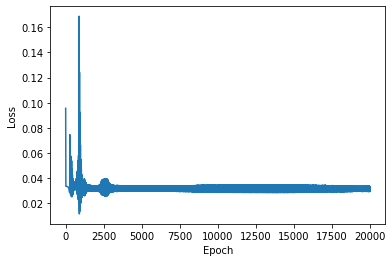

In [4]:
init = tf.global_variables_initializer()

loss_list = []

sess.run(init)

for iteration in range(0, 20000) :
    # train and net output
    _, val = sess.run([train_op, loss], feed_dict={input_x: x, output_y: y})
    loss_list.append(val)

yp = sess.run(m1out, feed_dict={input_x: x})

plt.plot(loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [5]:
input_x2 = tf.placeholder(tf.float32, [None, 1])
output_y2 = tf.placeholder(tf.float32, [None, 1])

h8 = tf.layers.dense(inputs=input_x2, units=10, activation=tf.nn.relu, name='h8')
h9 = tf.layers.dense(inputs=h8, units=18, activation=tf.nn.relu, name='h9')
h10 = tf.layers.dense(inputs=h9, units=15, activation=tf.nn.relu, name='h10')
h11 = tf.layers.dense(inputs=h10, units=4, activation=tf.nn.relu, name='h11')
m2out = tf.layers.dense(inputs=h11, units=1, name='m2out')

loss2 = tf.losses.mean_squared_error(output_y2, m2out) 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train_op2 = optimizer.minimize(loss2)

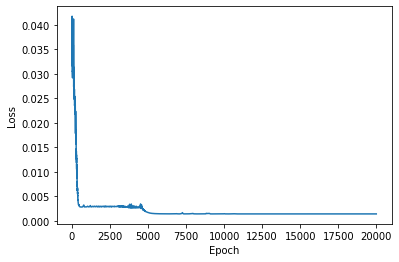

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#train_op2 = optimizer.minimize(loss2)

loss_list2 = []

for iteration in range(20000):
    # train and net output
    _, val2 = sess.run([train_op2, loss2], feed_dict={input_x2: x, output_y2: y})
    loss_list2.append(val2)

yp2 = sess.run(m2out, feed_dict={input_x2: x})

plt.plot(loss_list2)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Text(0.5, 0, 'epoch')

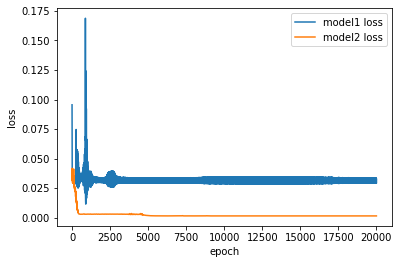

In [7]:
plt.plot(loss_list, label='model1 loss')
plt.plot(loss_list2, label='model2 loss')
# plt.plot(loss_list3, label='model3')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')

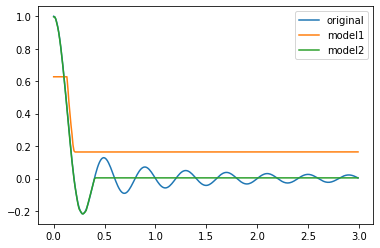

In [8]:
plt.plot(x,y, label='original')
plt.plot(x, yp, label='model1')
plt.plot(x, yp2, label='model2')
plt.legend()

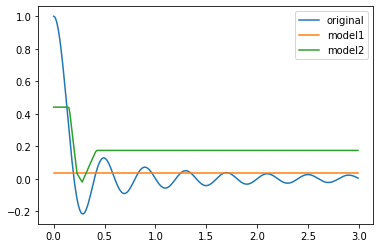

In [13]:
plt.plot(x,y, label='original')
plt.plot(x, yp, label='model1')
plt.plot(x, yp2, label='model2')
plt.legend()

In [9]:
x2 =np.expand_dims(np.arange(0.0, 3.0, 0.01),1)
y2 =np.sign(np.sin(5*x))

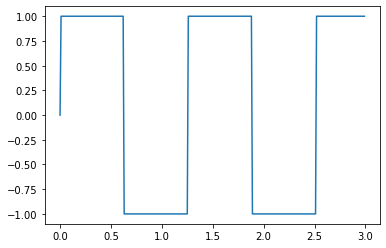

In [10]:
plt.plot(x2, y2)

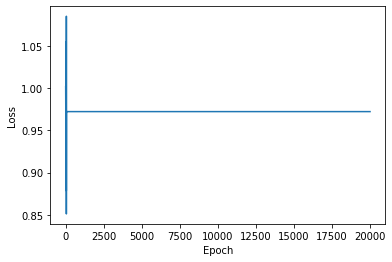

In [11]:
init = tf.global_variables_initializer()

loss_list4 = []

sess.run(init)

for iteration in range(0, 20000) :
    # train and net output
    _, val4 = sess.run([train_op, loss], feed_dict={input_x: x2, output_y: y2})
    loss_list4.append(val4)

yp4 = sess.run(m1out, feed_dict={input_x: x2})

plt.plot(loss_list4)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

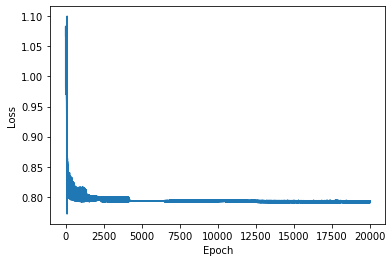

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train_op2 = optimizer.minimize(loss2)

loss_list5 = []

for iteration in range(20000):
    # train and net output
    _, val5 = sess.run([train_op2, loss2], feed_dict={input_x2: x2, output_y2: y2})
    loss_list5.append(val5)

yp5 = sess.run(m2out, feed_dict={input_x2: x2})

plt.plot(loss_list5)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(loss_list4, label='model1 loss')
plt.plot(loss_list5, label='model2 loss')

plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')

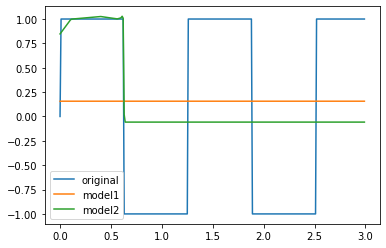

In [13]:
plt.plot(x2,y2, label='original')
plt.plot(x2, yp4, label='model1')
plt.plot(x2, yp5, label='model2')
plt.legend()

In [14]:
input_x3 = tf.placeholder(tf.float32, [None, 1])
output_y3 = tf.placeholder(tf.float32, [None, 1])

h12 = tf.layers.dense(inputs=input_x3, units=190, activation=tf.nn.relu, name='h12')
m3out = tf.layers.dense(inputs=h12, units=1, name='m3out')

loss3 = tf.losses.mean_squared_error(output_y3, m3out)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)